In [1]:
import sqlite3

# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ("Laptop", 5, 70000),
    ("Laptop", 2, 70000),
    ("Headphones", 10, 1500),
    ("Mouse", 15, 500),
    ("Keyboard", 8, 1200),
    ("Monitor", 3, 15000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()


Sales Summary:
       product  total_quantity   revenue
0  Headphones              10   15000.0
1    Keyboard               8    9600.0
2      Laptop               7  490000.0
3     Monitor               3   45000.0
4       Mouse              15    7500.0


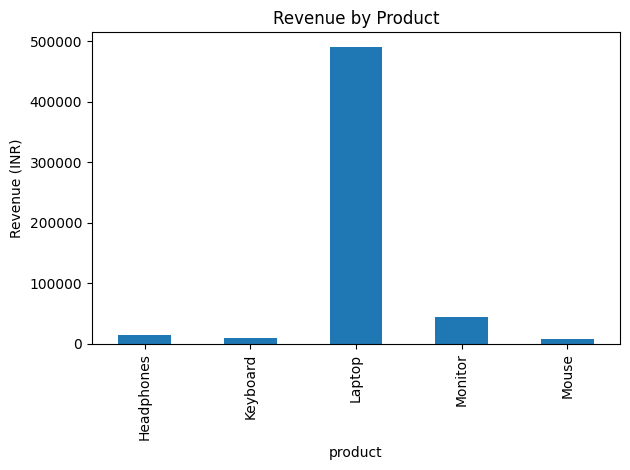

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = """
SELECT product, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display output
print("Sales Summary:\n", df)

# Bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Saves the chart
plt.show()

conn.close()
